# bulbea
> Deep Learning based Python Library for Stock Market Prediction and Modelling

![](bulbea.png)

A canonical way of importing the `bulbea` module is as follows:

In [1]:
import bulbea as bb

### `bulbea.Share`

In order to analyse a desired share, we use the `Share` object defined under `bulbea` which considers 2 arguments - *the **source code** for the economic data* and *the **ticker symbol** for a said company*.

In [2]:
ticker = 'GOOGL'

Go ahead and create a `Share` object as follows:

In [3]:
share = bb.Share(ticker, '2012-1-1', '2017-1-1')

By default, a `Share` object for a said source and symbol provides you historical data since a company's inception, as a `pandas.DataFrame` object. In order to access the same, use the `Share` object's member variable - `data` as follows:

In [4]:
data     = share.data
nsamples = 5
data.tail(nsamples)

,Adj Close,adjHigh,adjLow,adjOpen,adjVolume,Close,divCash,High,Low,Open,splitFactor,Volume
Date,,,,,,,,,,,,
2016-12-23,807.80,810.9696,805.110,808.01,765537,807.80,0.0,810.9696,805.110,808.01,1.0,765537
2016-12-27,809.93,816.0000,805.800,808.68,975962,809.93,0.0,816.0000,805.800,808.68,1.0,975962
2016-12-28,804.57,813.3300,802.440,813.33,1214756,804.57,0.0,813.3300,802.440,813.33,1.0,1214756
2016-12-29,802.88,805.7500,798.144,802.33,1057392,802.88,0.0,805.7500,798.144,802.33,1.0,1057392
2016-12-30,792.45,803.2850,789.620,803.21,1735879,792.45,0.0,803.2850,789.620,803.21,1.0,1735879


In order to analyse a given attribute, you could plot the same as follows:

In [5]:
figsize = (20, 15)

% matplotlib inline

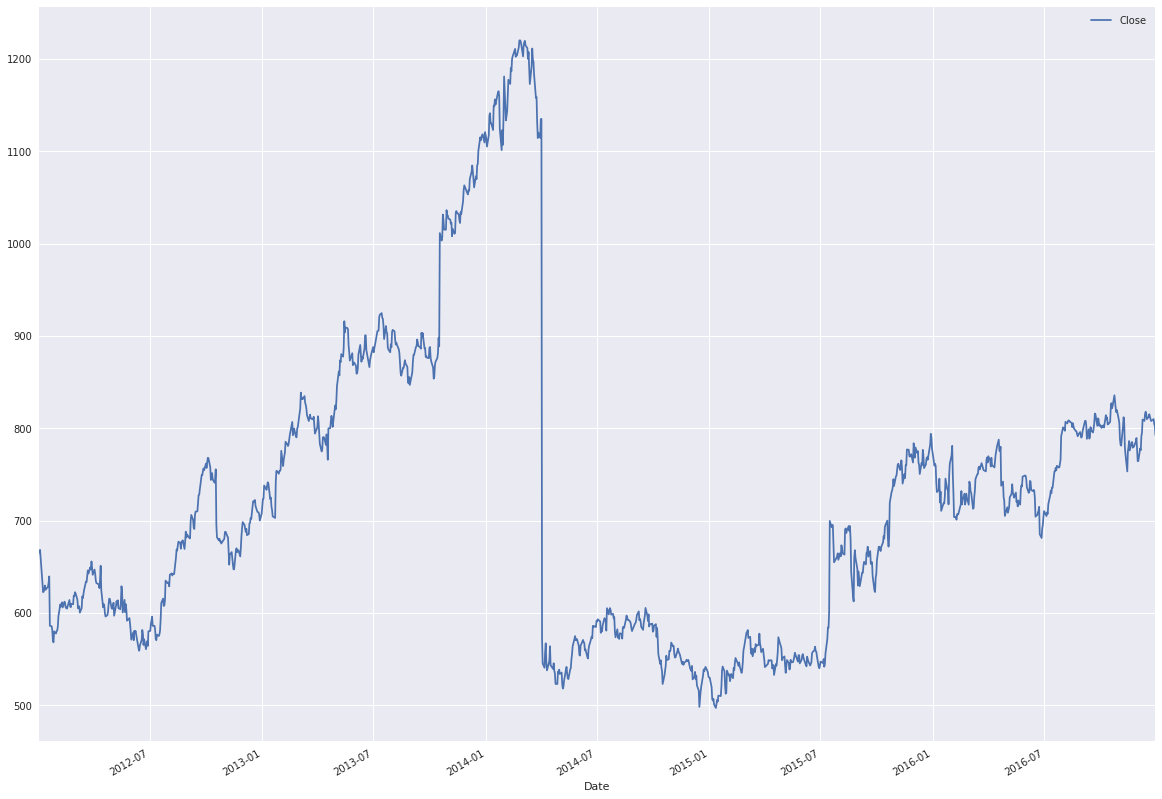

In [6]:
share.plot(figsize = figsize)

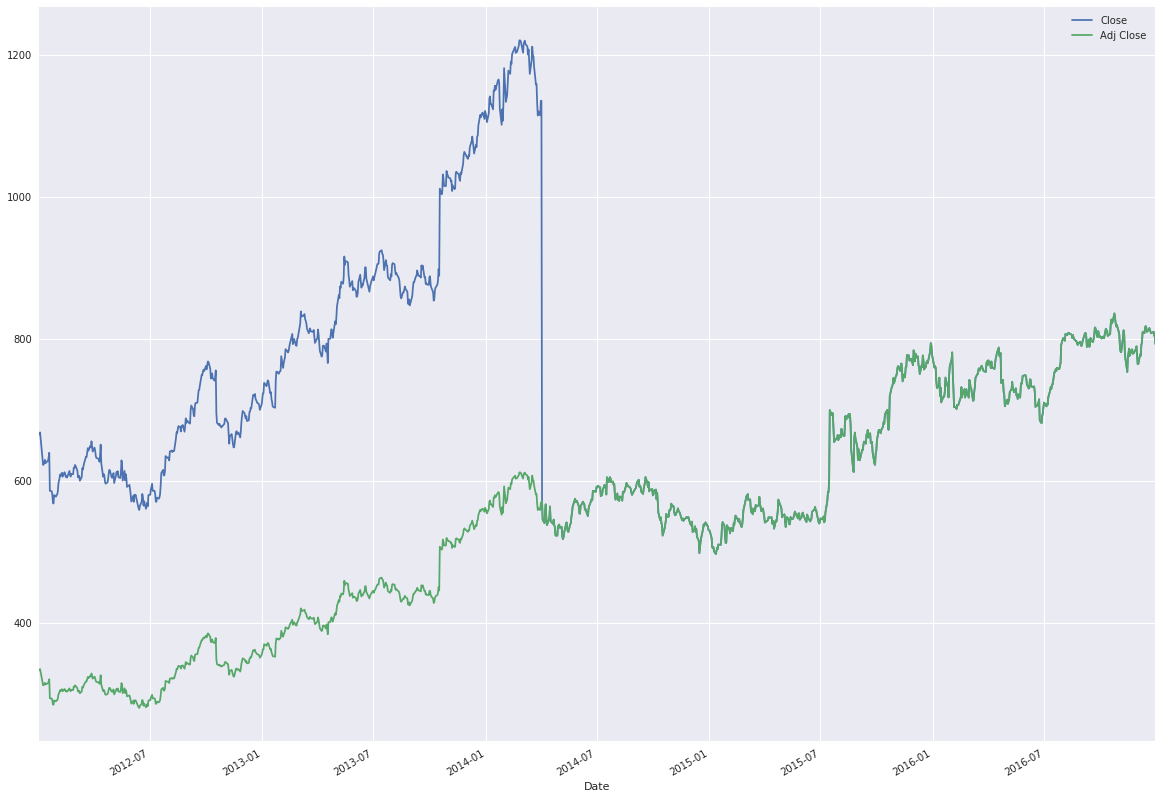

In [7]:
share.plot(['Close', 'Adj Close'], figsize = figsize)

### Statistics

#### Global Mean
In order to plot the **global mean** of the stock, we could do the same as follows:

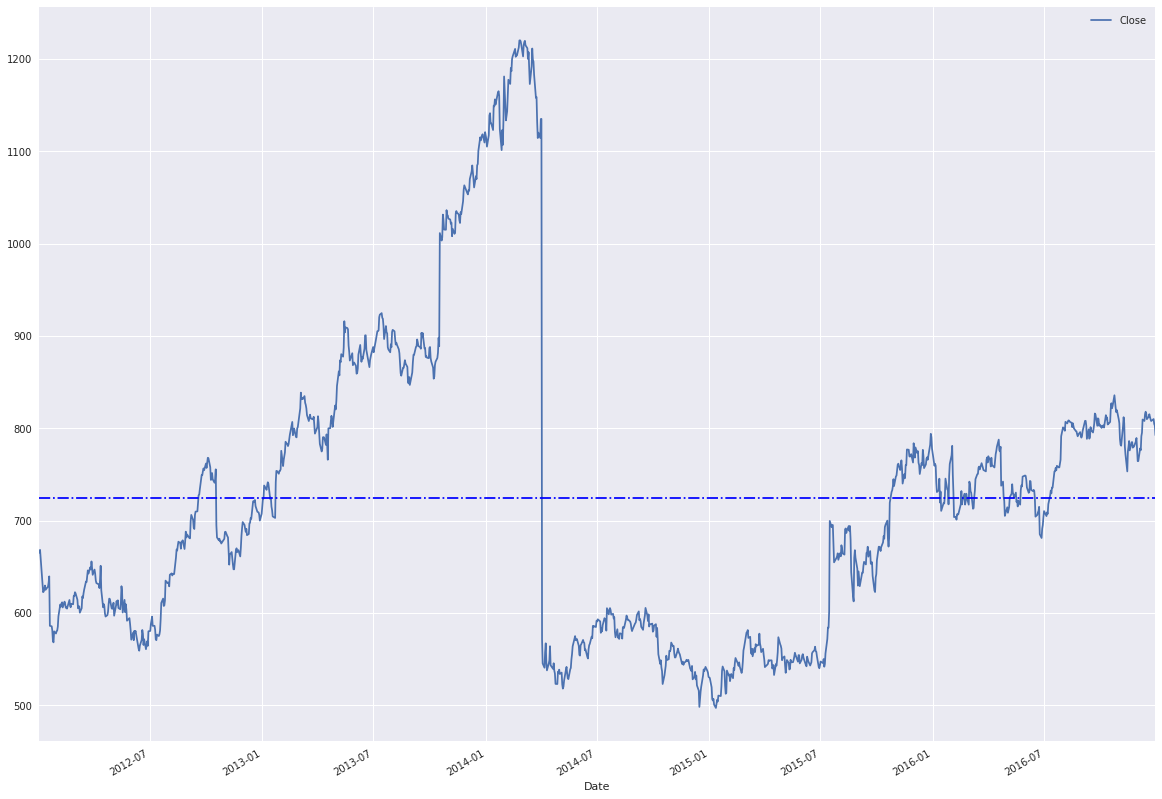

In [8]:
share.plot(figsize = (20, 15), global_mean = True)

#### Moving Averages and Bollinger Bands (R)

In [9]:
bands = share.bollinger_bands(period = 50, bandwidth = 2)
bands.tail(nsamples)

,Lower (Close),Mean (Close),Upper (Close)
Date,,,
2016-12-23,758.714467,798.4330,838.151533
2016-12-27,758.725016,798.5396,838.354184
2016-12-28,758.713085,798.4942,838.275315
2016-12-29,758.874401,798.1220,837.369599
2016-12-30,759.055517,797.4292,835.802883


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b24574a58>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f7b244f4da0>], dtype=object)

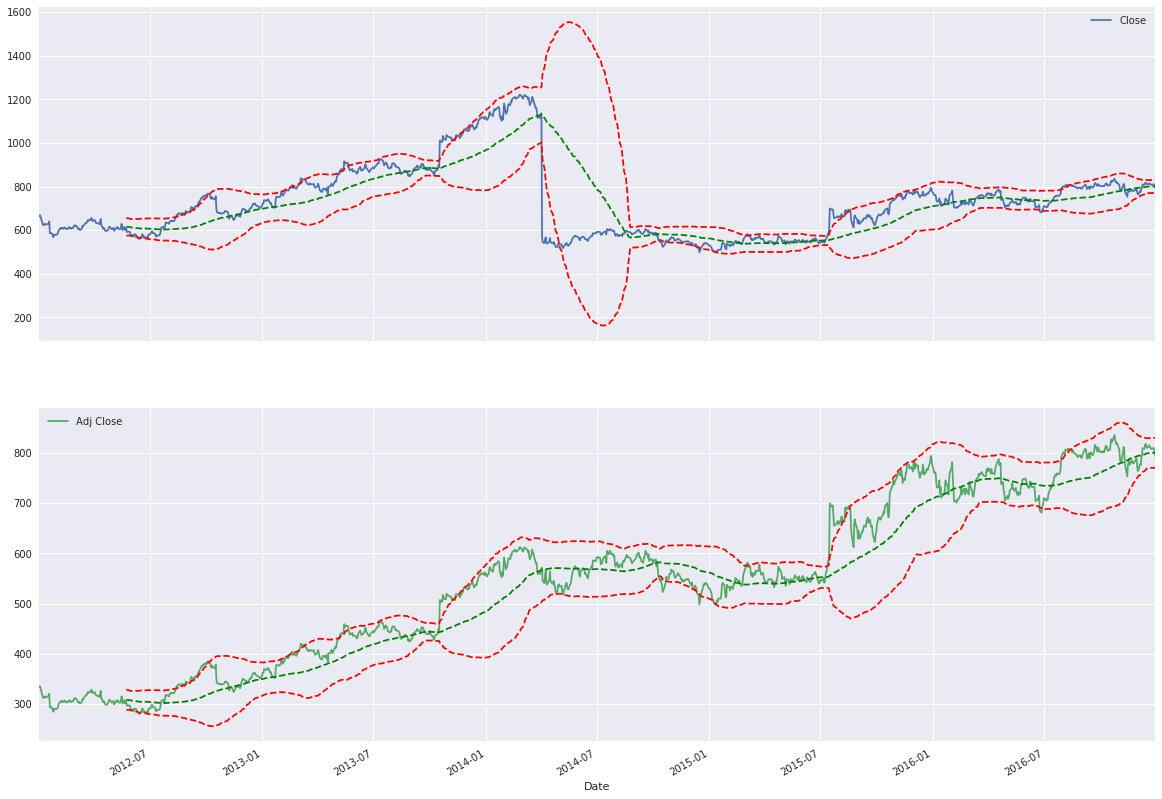

In [10]:
share.plot(['Close', 'Adj Close'], figsize = (20, 15), bollinger_bands = True, period = 100, bandwidth = 2)

### Training & Testing

In [11]:
from bulbea.learn.evaluation import split

In [12]:
Xtrain, Xtest, ytrain, ytest = split(share, 'Close', normalize = True)

In [13]:
import numpy as np

In [14]:
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtest  = np.reshape(Xtest,  ( Xtest.shape[0],  Xtest.shape[1], 1))

### Modelling

In [25]:
layers      = [1, 100, 100, 1] # number of neurons in each layer
nbatch      = 512              
epochs      = 20     
nvalidation = 0.05

In [26]:
from bulbea.learn.models import RNN
from bulbea.learn.models.ann import RNNCell

In [27]:
rnn = RNN(layers, cell = RNNCell.LSTM)

/home/r3m1ck/miniconda3/envs/python3/lib/python3.6/site-packages/bulbea-0.1.0-py3.6.egg/bulbea/learn/models/ann.py:29: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  return_sequences = True
/home/r3m1ck/miniconda3/envs/python3/lib/python3.6/site-packages/bulbea-0.1.0-py3.6.egg/bulbea/learn/models/ann.py:29: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=100)`
  return_sequences = True
/home/r3m1ck/miniconda3/envs/python3/lib/python3.6/site-packages/bulbea-0.1.0-py3.6.egg/bulbea/learn/models/ann.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  self.model.add(core.Dense(output_dim = sizes[-1]))


#### TRAINING

In [28]:
rnn.fit(Xtrain, ytrain,
        batch_size       = nbatch,
        nb_epoch         = epochs,
        validation_split = nvalidation)

/home/r3m1ck/miniconda3/envs/python3/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 709 samples, validate on 38 samples
Epoch 1/20
709/709 [==============================] - 1s - loss: 0.0062 - val_loss: 0.0029
Epoch 2/20
709/709 [==============================] - 0s - loss: 0.0071 - val_loss: 5.5764e-04
Epoch 3/20
709/709 [==============================] - 0s - loss: 0.0026 - val_loss: 7.0538e-04
Epoch 4/20
709/709 [==============================] - 0s - loss: 0.0021 - val_loss: 6.5267e-04
Epoch 5/20
709/709 [==============================] - 0s - loss: 0.0021 - val_loss: 5.9091e-04
Epoch 6/20
709/709 [==============================] - 0s - loss: 0.0022 - val_loss: 7.6969e-04
Epoch 7/20
709/709 [==============================] - 0s - loss: 0.0022 - val_loss: 6.2637e-04
Epoch 8/20
709/709 [==============================] - 0s - loss: 0.0019 - val_loss: 7.4190e-04
Epoch 9/20
709/709 [==============================] - 0s - loss: 0.0020 - val_loss: 6.4665e-04
Epoch 10/20
709/709 [==============================] - 0s - loss: 0.0019 - val_loss: 5.5683e-04
Epoch 11

#### TESTING

In [29]:
predicted = rnn.predict(Xtest)

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mean_squared_error(ytest, predicted)

0.0012733314874551209

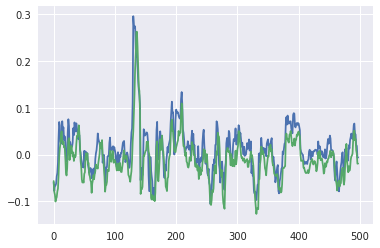

In [32]:
import matplotlib.pyplot as pplt
pplt.plot(ytest)
pplt.plot(predicted)
pplt.show()

### Sentiment Analysis

In [24]:
s = bb.sentiment(share)
print(s)

None
